In [35]:
from pydriller import Repository
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
def getChangesInRepository(repoPath):
    changes = []

    for commit in Repository(repoPath).traverse_commits():
        for file in commit.modified_files:
            record = {
                'path': file.new_path,
                'commit': commit.hash,
                'author': commit.author.name,
                'lines_added': file.added_lines,
                'lines_deleted': file.deleted_lines,
            }
            changes.append(record)

    return changes

In [29]:
changes = getChangesInRepository('https://github.com/IntegerMan/GitVisualizer')
changes

[{'path': '.gitignore',
  'commit': 'a85288e6deee374264b13d3143c886962e90550d',
  'author': 'Matt Eland',
  'lines_added': 0,
  'lines_deleted': 0},
 {'path': 'README.md',
  'commit': 'a85288e6deee374264b13d3143c886962e90550d',
  'author': 'Matt Eland',
  'lines_added': 1,
  'lines_deleted': 0},
 {'path': '.gitignore',
  'commit': 'c58bad1219a1cf9b9b1105791fffc331a6d902fe',
  'author': 'Matt Eland',
  'lines_added': 139,
  'lines_deleted': 0},
 {'path': 'Experimentation.ipynb',
  'commit': 'c58bad1219a1cf9b9b1105791fffc331a6d902fe',
  'author': 'Matt Eland',
  'lines_added': 36,
  'lines_deleted': 0},
 {'path': 'Experimentation.ipynb',
  'commit': '93847fdd7442be01b96103dfb281eb1ae64ece45',
  'author': 'Matt Eland',
  'lines_added': 56,
  'lines_deleted': 2},
 {'path': 'Experimentation.ipynb',
  'commit': '5046140600e8c4b698956f25353f092e5fc8aafc',
  'author': 'Matt Eland',
  'lines_added': 75,
  'lines_deleted': 9}]

In [30]:
df = pd.DataFrame(changes)
df['count'] = 1 # used for summing in grouped mode
df

,path,commit,author,lines_added,lines_deleted,count
0,.gitignore,a85288e6deee374264b13d3143c886962e90550d,Matt Eland,0,0,1
1,README.md,a85288e6deee374264b13d3143c886962e90550d,Matt Eland,1,0,1
2,.gitignore,c58bad1219a1cf9b9b1105791fffc331a6d902fe,Matt Eland,139,0,1
3,Experimentation.ipynb,c58bad1219a1cf9b9b1105791fffc331a6d902fe,Matt Eland,36,0,1
4,Experimentation.ipynb,93847fdd7442be01b96103dfb281eb1ae64ece45,Matt Eland,56,2,1
5,Experimentation.ipynb,5046140600e8c4b698956f25353f092e5fc8aafc,Matt Eland,75,9,1


In [31]:
grouped = df.groupby(by=['path']).sum()
grouped

,lines_added,lines_deleted,count
path,,,
.gitignore,139,0,2
Experimentation.ipynb,167,11,3
README.md,1,0,1


In [32]:
# TODO: I need a matrix of files and the count of times they were changed alongside other files

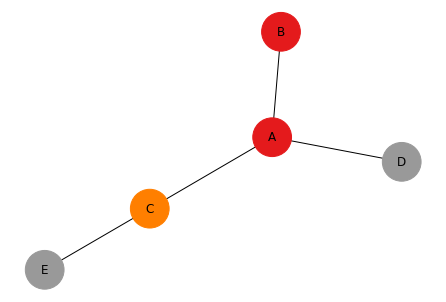

In [36]:
# libraries
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})

# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })

# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!

# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())

# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes

# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)